## Задание 1

Ответьте на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью? Для ответа выполните следующие шаги:

1. Постройте точечный график.
1. Рассчитайте коэффициенты корреляции Пирсона и Спирмена.
1. Постройте модель линейной регрессии.
1. Рассчитайте коэффициент детерминации.
1. Выведите график остатков.

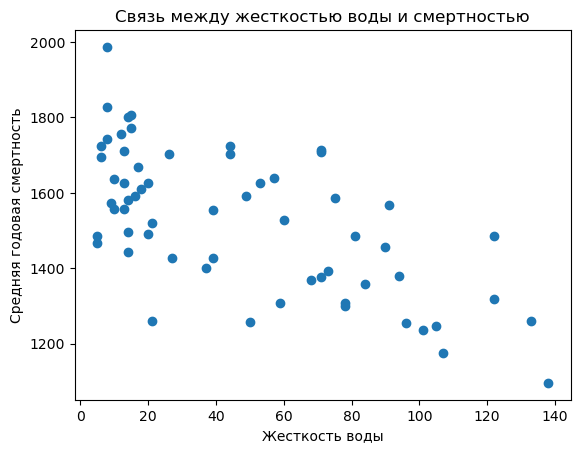

Коэффициент корреляции Пирсона: -0.6548486232042466
Коэффициент корреляции Спирмена: -0.6316646189166502
Коэффициент детерминации: 0.4288267193124974


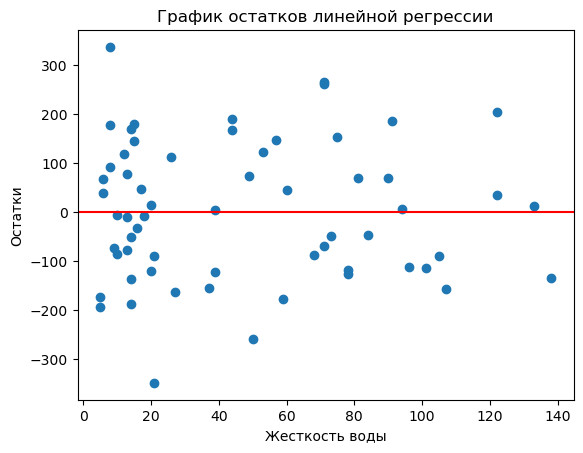

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Шаг 1: Загрузка данных и построение точечного графика
data = pd.read_csv('water.csv')
plt.scatter(data['hardness'], data['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Средняя годовая смертность')
plt.title('Связь между жесткостью воды и смертностью')
plt.show()

# Шаг 2: Расчет коэффициентов корреляции Пирсона и Спирмена
pearson_corr, _ = pearsonr(data['hardness'], data['mortality'])
spearman_corr, _ = spearmanr(data['hardness'], data['mortality'])
print(f'Коэффициент корреляции Пирсона: {pearson_corr}')
print(f'Коэффициент корреляции Спирмена: {spearman_corr}')

# Шаг 3: Построение модели линейной регрессии
X = data['hardness'].values.reshape(-1, 1)
y = data['mortality'].values
model = LinearRegression().fit(X, y)

# Шаг 4: Расчет коэффициента детерминации
r2 = model.score(X, y)
print(f'Коэффициент детерминации: {r2}')

# Шаг 5: Вывод графика остатков
predictions = model.predict(X)
residuals = y - predictions
plt.scatter(data['hardness'], residuals)
plt.xlabel('Жесткость воды')
plt.ylabel('Остатки')
plt.title('График остатков линейной регрессии')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


## Задание 2

Ответьте на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? Для ответ выполните следующие шаги:

1. Разделите данные на 2 группы.
1. Повторите аналогичные шаги из пункта 1 для каждой группы по отдельности.

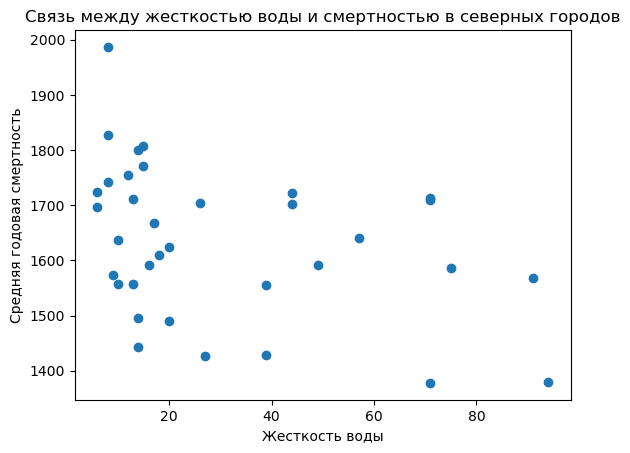

северных городов - Коэффициент корреляции Пирсона: -0.36859783832887194
северных городов - Коэффициент корреляции Спирмена: -0.4042078956511175
северных городов - Коэффициент детерминации: 0.1358643664207173


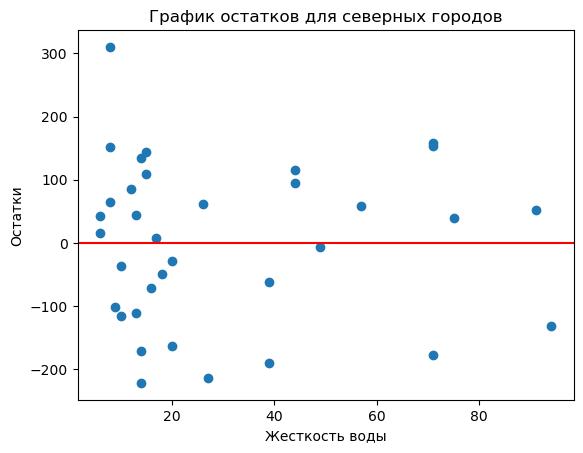

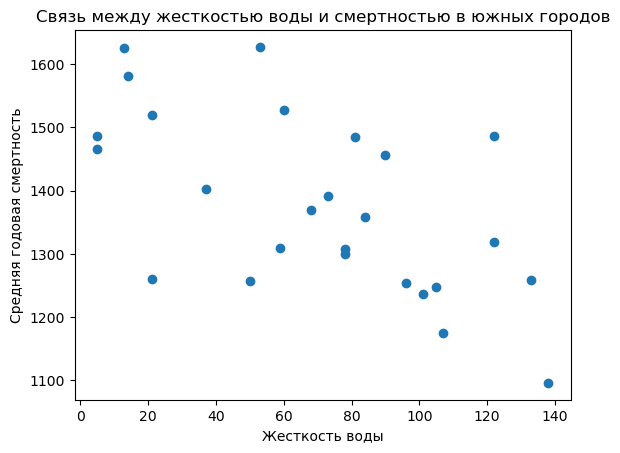

южных городов - Коэффициент корреляции Пирсона: -0.6021532715484156
южных городов - Коэффициент корреляции Спирмена: -0.5957229185013566
южных городов - Коэффициент детерминации: 0.3625885624364602


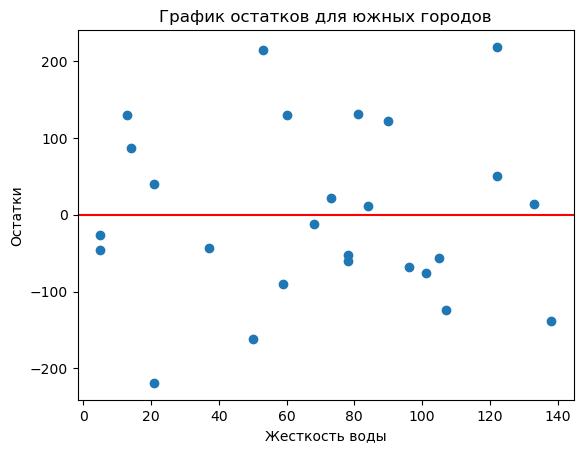

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Загрузка данных
data = pd.read_csv('water.csv')

# Разделение данных на две группы
data_north = data[data['location'] == 'North']
data_south = data[data['location'] == 'South']

# Функция для анализа группы данных
def analyze_group(data_group, group_name):
    # Построение точечного графика
    plt.scatter(data_group['hardness'], data_group['mortality'])
    plt.xlabel('Жесткость воды')
    plt.ylabel('Средняя годовая смертность')
    plt.title(f'Связь между жесткостью воды и смертностью в {group_name}')
    plt.show()

    # Расчет коэффициентов корреляции
    pearson_corr, _ = pearsonr(data_group['hardness'], data_group['mortality'])
    spearman_corr, _ = spearmanr(data_group['hardness'], data_group['mortality'])
    print(f'{group_name} - Коэффициент корреляции Пирсона: {pearson_corr}')
    print(f'{group_name} - Коэффициент корреляции Спирмена: {spearman_corr}')

    # Построение модели линейной регрессии
    X = data_group['hardness'].values.reshape(-1, 1)
    y = data_group['mortality'].values
    model = LinearRegression().fit(X, y)

    # Расчет коэффициента детерминации
    r2 = model.score(X, y)
    print(f'{group_name} - Коэффициент детерминации: {r2}')

    # График остатков
    predictions = model.predict(X)
    residuals = y - predictions
    plt.scatter(data_group['hardness'], residuals)
    plt.xlabel('Жесткость воды')
    plt.ylabel('Остатки')
    plt.title(f'График остатков для {group_name}')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()

# Анализ для северных городов
analyze_group(data_north, 'северных городов')

# Анализ для южных городов
analyze_group(data_south, 'южных городов')
